<a href="https://colab.research.google.com/github/RajivChitale/epoch/blob/main/RL-tabular-methods/06-value-iteration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
!pip install ray[rllib]
# !pip install --upgrade ipykernel
import gymnasium as gym
from matplotlib import pyplot as plt

In [ ]:
env = gym.make('FrozenLake-v1', map_name = '4x4', is_slippery = True)

  # MAP:
  # "SFFF",
  # "FHFH",
  # "FFFH",
  # "HFFG"

# env.env.P[3]

height = 4
width = 4
num_actions = env.env.action_space.n

In [ ]:
def updated_state_value(V, state, discount):
  # find maximum over all actions

  max_value = None
  best_action = None

  for action in range(num_actions):
    updated_value = 0   # default for terminal state
    # all possibile transitions due to environment
    future = env.env.P[state][action]
    for next in future:
      # if next == state:
      #   continue
      probability, next_state, reward, done = next
      updated_value += probability * (reward + discount * V[next_state])

    if max_value == None or max_value < updated_value:
      max_value = updated_value
      best_action = action
    # print(V[state], max_value)
  return max_value, best_action


def gen_policy(V, discount):
  P = np.zeros(height*width) # initialize with 0 (or random values if it gets stuck at start)
  for state in range(len(P)):
    _, best_action = updated_state_value(V, state, discount)
    P[state] = best_action
  return P


def value_iteration(theta = 0.0001, discount = 0.99):
  V = np.random.random(height*width) * 0.0  # initialize with 0 (or random values if it gets stuck at start)

  # training loop
  i = 0
  while True:
    delta = 0
    # update every state
    for state in range(len(V)):
      temp_V = V[state]
      V[state], _ = updated_state_value(V, state, discount)
      delta = max(delta, abs(V[state]-temp_V))

    # print(delta)
    if delta < theta: break

  P = gen_policy(V, discount)
  P = np.vectorize(lambda x: actionMap[x]) (P)

  return V.reshape(height, width), P.reshape(height, width)

actionMap = {
    0 : 'L',
    1 : 'D',
    2 : 'R',
    3 : 'U'
}

V,P = value_iteration()

print(V)
print(P)

[[0.54083394 0.49722378 0.46884941 0.45487071]
 [0.55739213 0.         0.35755091 0.        ]
 [0.5909355  0.64245898 0.61466487 0.        ]
 [0.         0.74129273 0.86262154 0.        ]]
[['L' 'U' 'U' 'U']
 ['L' 'L' 'L' 'L']
 ['U' 'D' 'L' 'L']
 ['L' 'R' 'D' 'L']]


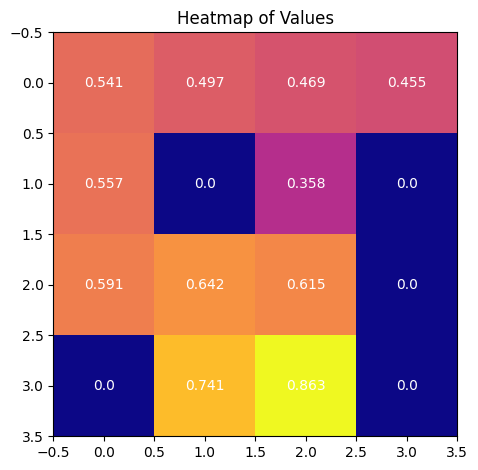

In [ ]:
def heatmap(V):
    fig, ax = plt.subplots()
    im = ax.imshow(V, interpolation='none', cmap='plasma')

    for i in range(height):
        for j in range(width):
            text = ax.text(j, i, round(V[i, j],3), ha="center", va="center", color="w")

    ax.set_title("Heatmap of Values")
    fig.tight_layout()
    plt.show()
    #print(V)

heatmap(V)